# Underwater Trash Detection using YOLOv11

This notebook demonstrates the process of fine-tuning a YOLOv11 object detection model to identify underwater trash.

## Steps:

1.  **Download Data**: The dataset for underwater trash detection is downloaded using the `kagglehub` library. The dataset path is: `/kaggle/input/underwater-trash-detection/utd2.v8i.yolov8`.
    - Train images: 7308, Train labels: 7308
    - Val images: 1795, Val labels: 1795
    - Test images: 473, Test labels: 473

2.  **Data Exploration**: The downloaded data is explored to understand the directory structure and the number of images and labels in the training, validation, and test sets.

3.  **Create YAML File**: A YAML file is created to configure the dataset for YOLOv11 training, specifying the paths to the training, validation, and test images, as well as the class names ('Bio', 'Rov', 'Trash').

4.  **Fine-tuning YOLOv11**: The `ultralytics` library is used to load a pre-trained YOLOv11 model (`yolo11s.pt`) and fine-tune it on the underwater trash dataset for 30 epochs with an image size of 640.

5.  **Evaluate Training Results**: The training results are evaluated by examining the generated plots, such as the loss curves and confusion matrix, to assess the model's performance and check for overfitting.
    - Best Epoch's Validation Metrics: mAP50-95(B): 0.7017, mAP50(B): 0.9381
    - The model shows decreasing loss and increasing performance without overfitting.
    - Confusion Matrix Analysis: Strong at detecting "Trash" but struggles with background confusion, often classifying it as "Trash". Low confusion between actual object classes.

6.  **Generate Predictions**: The fine-tuned model is used to generate predictions on the test set images using the best weights from training.

7.  **Visualize Predictions**: Individual predictions are visualized by displaying images with the predicted bounding boxes and class labels.

## Comparison with other YOLOv11 Models (YOLOv11n, YOLOv11s, YOLOv11m)

- **Overall Performance (mAP50-95):** YOLOv11s (0.65) outperforms YOLOv11m (0.5791) and YOLOv11n (0.5867).
- **mAP50:** All models perform well (YOLOv11s: 0.93, YOLOv11m: 0.8877, YOLOv11n: 0.8905).
- **Confusion Matrix Analysis:** Consistent struggle with background confusion across models. YOLOv11s has higher correct "Trash" detections.
- **Training Time:** YOLOv11s is faster and uses fewer resources compared to YOLOv11m.

In summary, the YOLOv11s model demonstrates superior performance and efficiency for this underwater trash detection dataset.

## **Downloading Data**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karanwxlia/underwater-trash-detection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'underwater-trash-detection' dataset.
Path to dataset files: /kaggle/input/underwater-trash-detection


In [ ]:
!ls /root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8

ls: cannot access '/root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8': No such file or directory


In [ ]:
import os

path_yolo = f'{path}/utd2.v8i.yolov8'

train_path = f'{path_yolo}/train'
val_path = f'{path_yolo}/valid'
test_path = f'{path_yolo}/test'

print("Train Info:")
for dir in os.listdir(train_path):
  num_files = len(os.listdir(f'{train_path}/{dir}'))
  print(f'{dir}: {num_files}')

print("\nVal Info:")
for dir in os.listdir(val_path):
  num_files = len(os.listdir(f'{val_path}/{dir}'))
  print(f'{dir}: {num_files}')

print("\nTest Info:")
for dir in os.listdir(test_path):
  num_files = len(os.listdir(f'{test_path}/{dir}'))
  print(f'{dir}: {num_files}')

Train Info:
labels: 7308
images: 7308

Val Info:
labels: 1795
images: 1795

Test Info:
labels: 473
images: 473


vid_000255_frame0000029_jpg.rf.042414a9f0725cefc5c0ee0c2ff20e51.jpg
FishDataset7_png_jpg.rf.da3cf65f145e2696c8b26df2e2619743.jpg
bio0015_frame0000673_jpg.rf.86697dc980ce2b7791dbe1e87317fc06.jpg
obj1502_frame0000138_jpg.rf.6abf0f0427033681691a1da2f2ff4fad.jpg
bio0015_frame0000621_jpg.rf.6134e9a1a3438ce61a203c17441b8fde.jpg
obj0871_frame0000120_jpg.rf.d06a0b7c48ce7214ba71a0f08a3ad6b8.jpg
frame_02000_png_jpg.rf.e9223e77fd4ae74a1cf529af1a0bac65.jpg
bio0017_frame0000010_jpg.rf.fa93d325d284866712de3ab1dd19769b.jpg
bio0011_frame0000204_jpg.rf.25f5868301941f815fc3f587b363e8b0.jpg


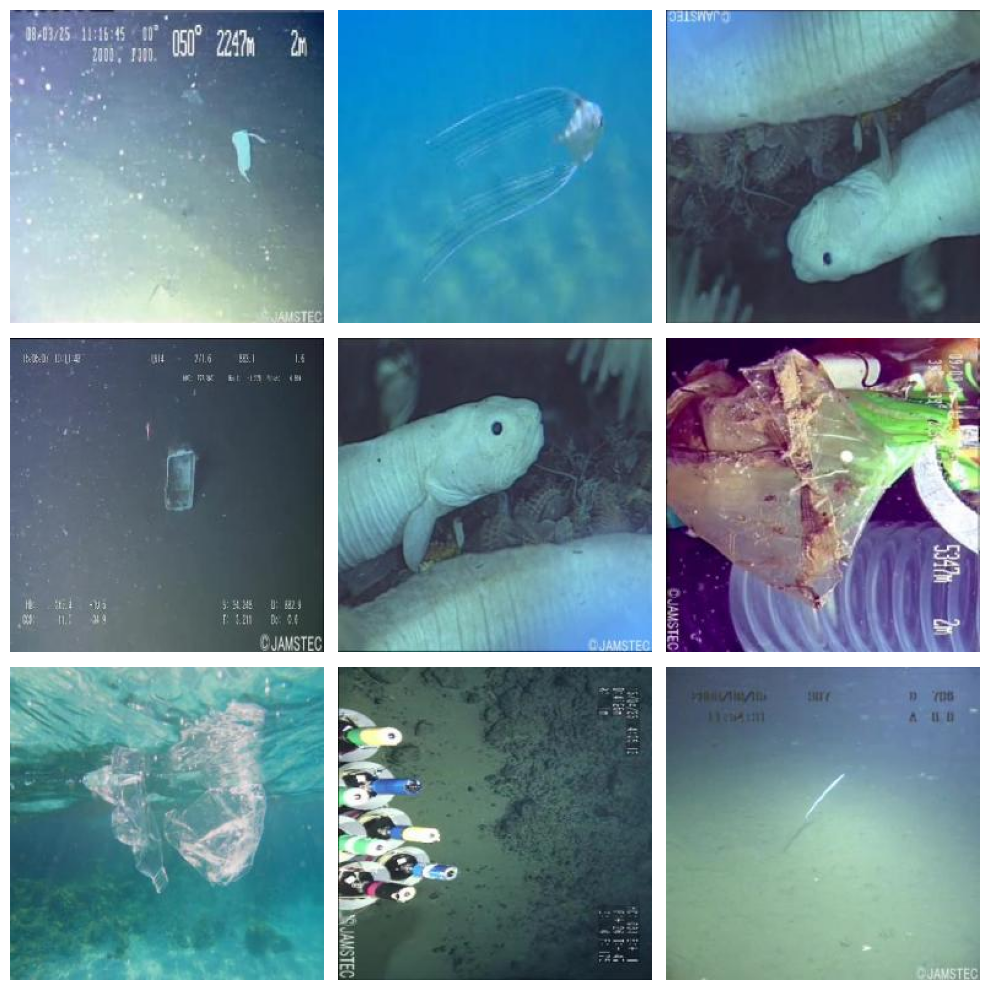

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

train_image_files = [f for f in os.listdir(f'{train_path}/images') if f.endswith(('.jpg', '.jpeg', '.png'))]

num_images_to_display = 9
selected_images = random.sample(train_image_files, num_images_to_display)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i, img_file in enumerate(selected_images):
    print(img_file)
    img_path = os.path.join(f'{train_path}/images', img_file)
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### **Creating YOLO YAML File**

**Clasess**

- Bio: Biological objects (fish, coral, algae, etc.).
- Trash: Trash or man-made debris on the seafloor ((plastic, trash, underwater debris).
- Rov: The underwater vehicle itself or parts of it (like its manipulator arm or tools).

In [ ]:
import yaml

data = {
    'path': path_yolo,
    'train': f"{train_path}/images",
    'val': f"{val_path}/images",
    'test': f"{test_path}/images",
    # Classes
    'names': {
        0: 'Bio',
        1: 'Rov',
        2: 'Trash'
    }
}

with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, sort_keys=False)

## **Fine-tuning YOLO11 (detection) with the dataset**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00


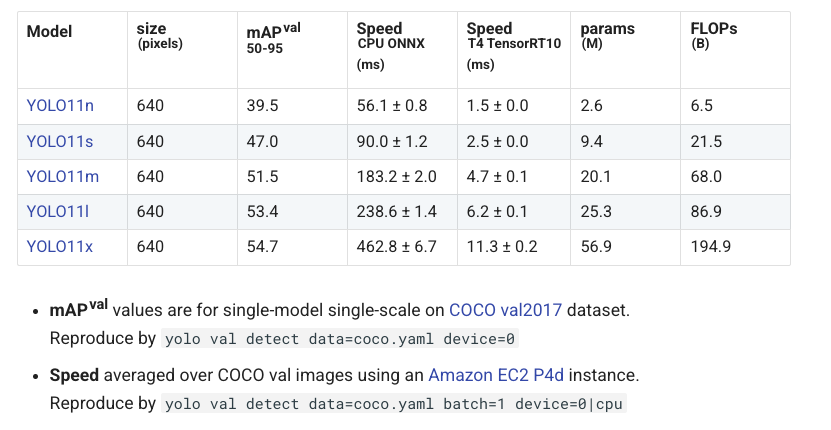

In [ ]:
from ultralytics import YOLO

# load YOLO model
model = YOLO("yolo11s.pt")

In [ ]:
EPOCHS = 30
IMAGE_SIZE = 640

results = model.train(
    data="data.yaml",
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    plots=True,
    patience=10, # Early stopping
    # --- Data Augmentation Parameters ---
    mosaic=1.0,         # Mosaic composition
    hsv_h=0.015,        # Hue augmentation
    hsv_s=0.7,          # Saturation augmentation
    hsv_v=0.4,          # Value augmentation
    degrees=10,         # Image rotation in degrees
    scale=0.5,          # Image scale (zoom)
    fliplr=0.5,         # Horizontal flip (left-right)
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspectiv

## **Evaluation**

## **Metrics:**

* **box_loss**: Measures the error in the predicted bounding boxes' location and size compared to the ground truth. It's calculated as 1 - Intersection over Union.
* **cls_loss**: The error in classifying the object within the bounding box. It's calculated as cross-entropy.
* **mAP**: mean Average Precision, which measures how good the model's detections are. The closer this value is to 1, the better the performance.

In [ ]:
print("\nBest Epoch's Validation Metrics:")
mean_metrics = results.mean_results()
print(f"- mAP50-95(B): {mean_metrics[3]:.4f}")
print(f"- mAP50(B): {mean_metrics[2]:.4f}")


Best Epoch's Validation Metrics:
- mAP50-95(B): 0.7017
- mAP50(B): 0.9381


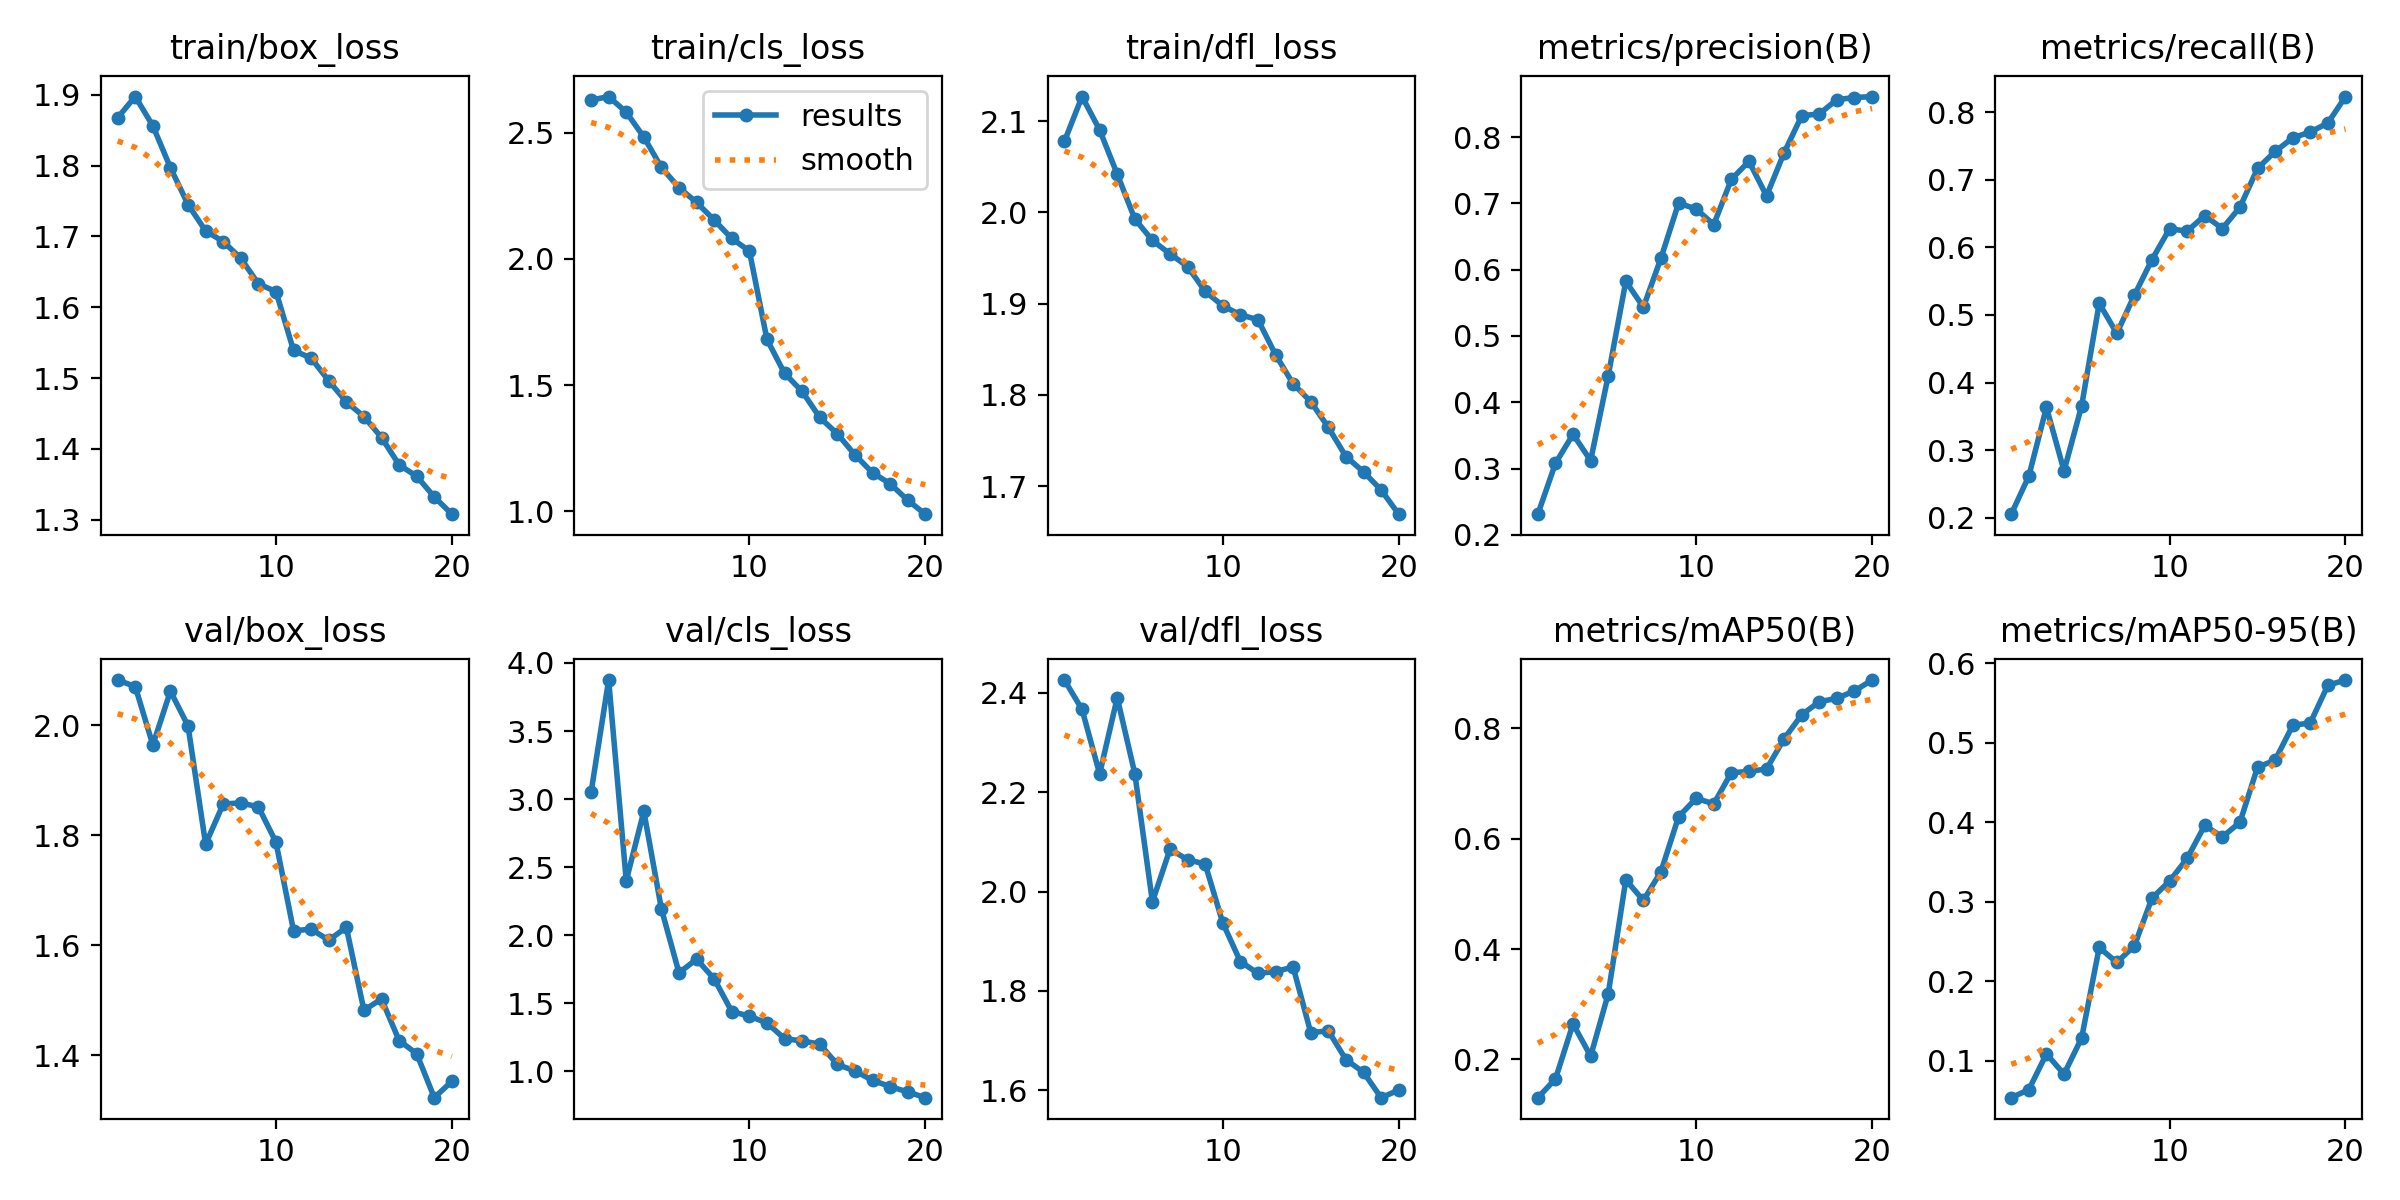

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='/content/runs/detect/train/results.png', width=1300)

### **Conclusions Metrics**

- **Losses are Decreasing Correctly:**
On both the training (train) and validation (val) sets, all three loss metrics (box_loss, cls_loss, dfl_loss) are consistently decreasing.

- **Performance (mAP) is Constantly Increasing:**
The most important performance metrics (Precision, Recall, mAP50, and mAP50-95) are rising with every epoch. This confirms that as the model learns, its ability to accurately and comprehensively detect objects is improving.

- **No Signs of Overfitting:**
A very important point is that the validation loss curves (val/) are following the same downward trend as the training curves (train/). If the validation loss started to rise while the training loss continued to fall, it would be a sign of overfitting (the model is memorizing instead of learning). This is not the case here, which indicates the model is generalizing well.

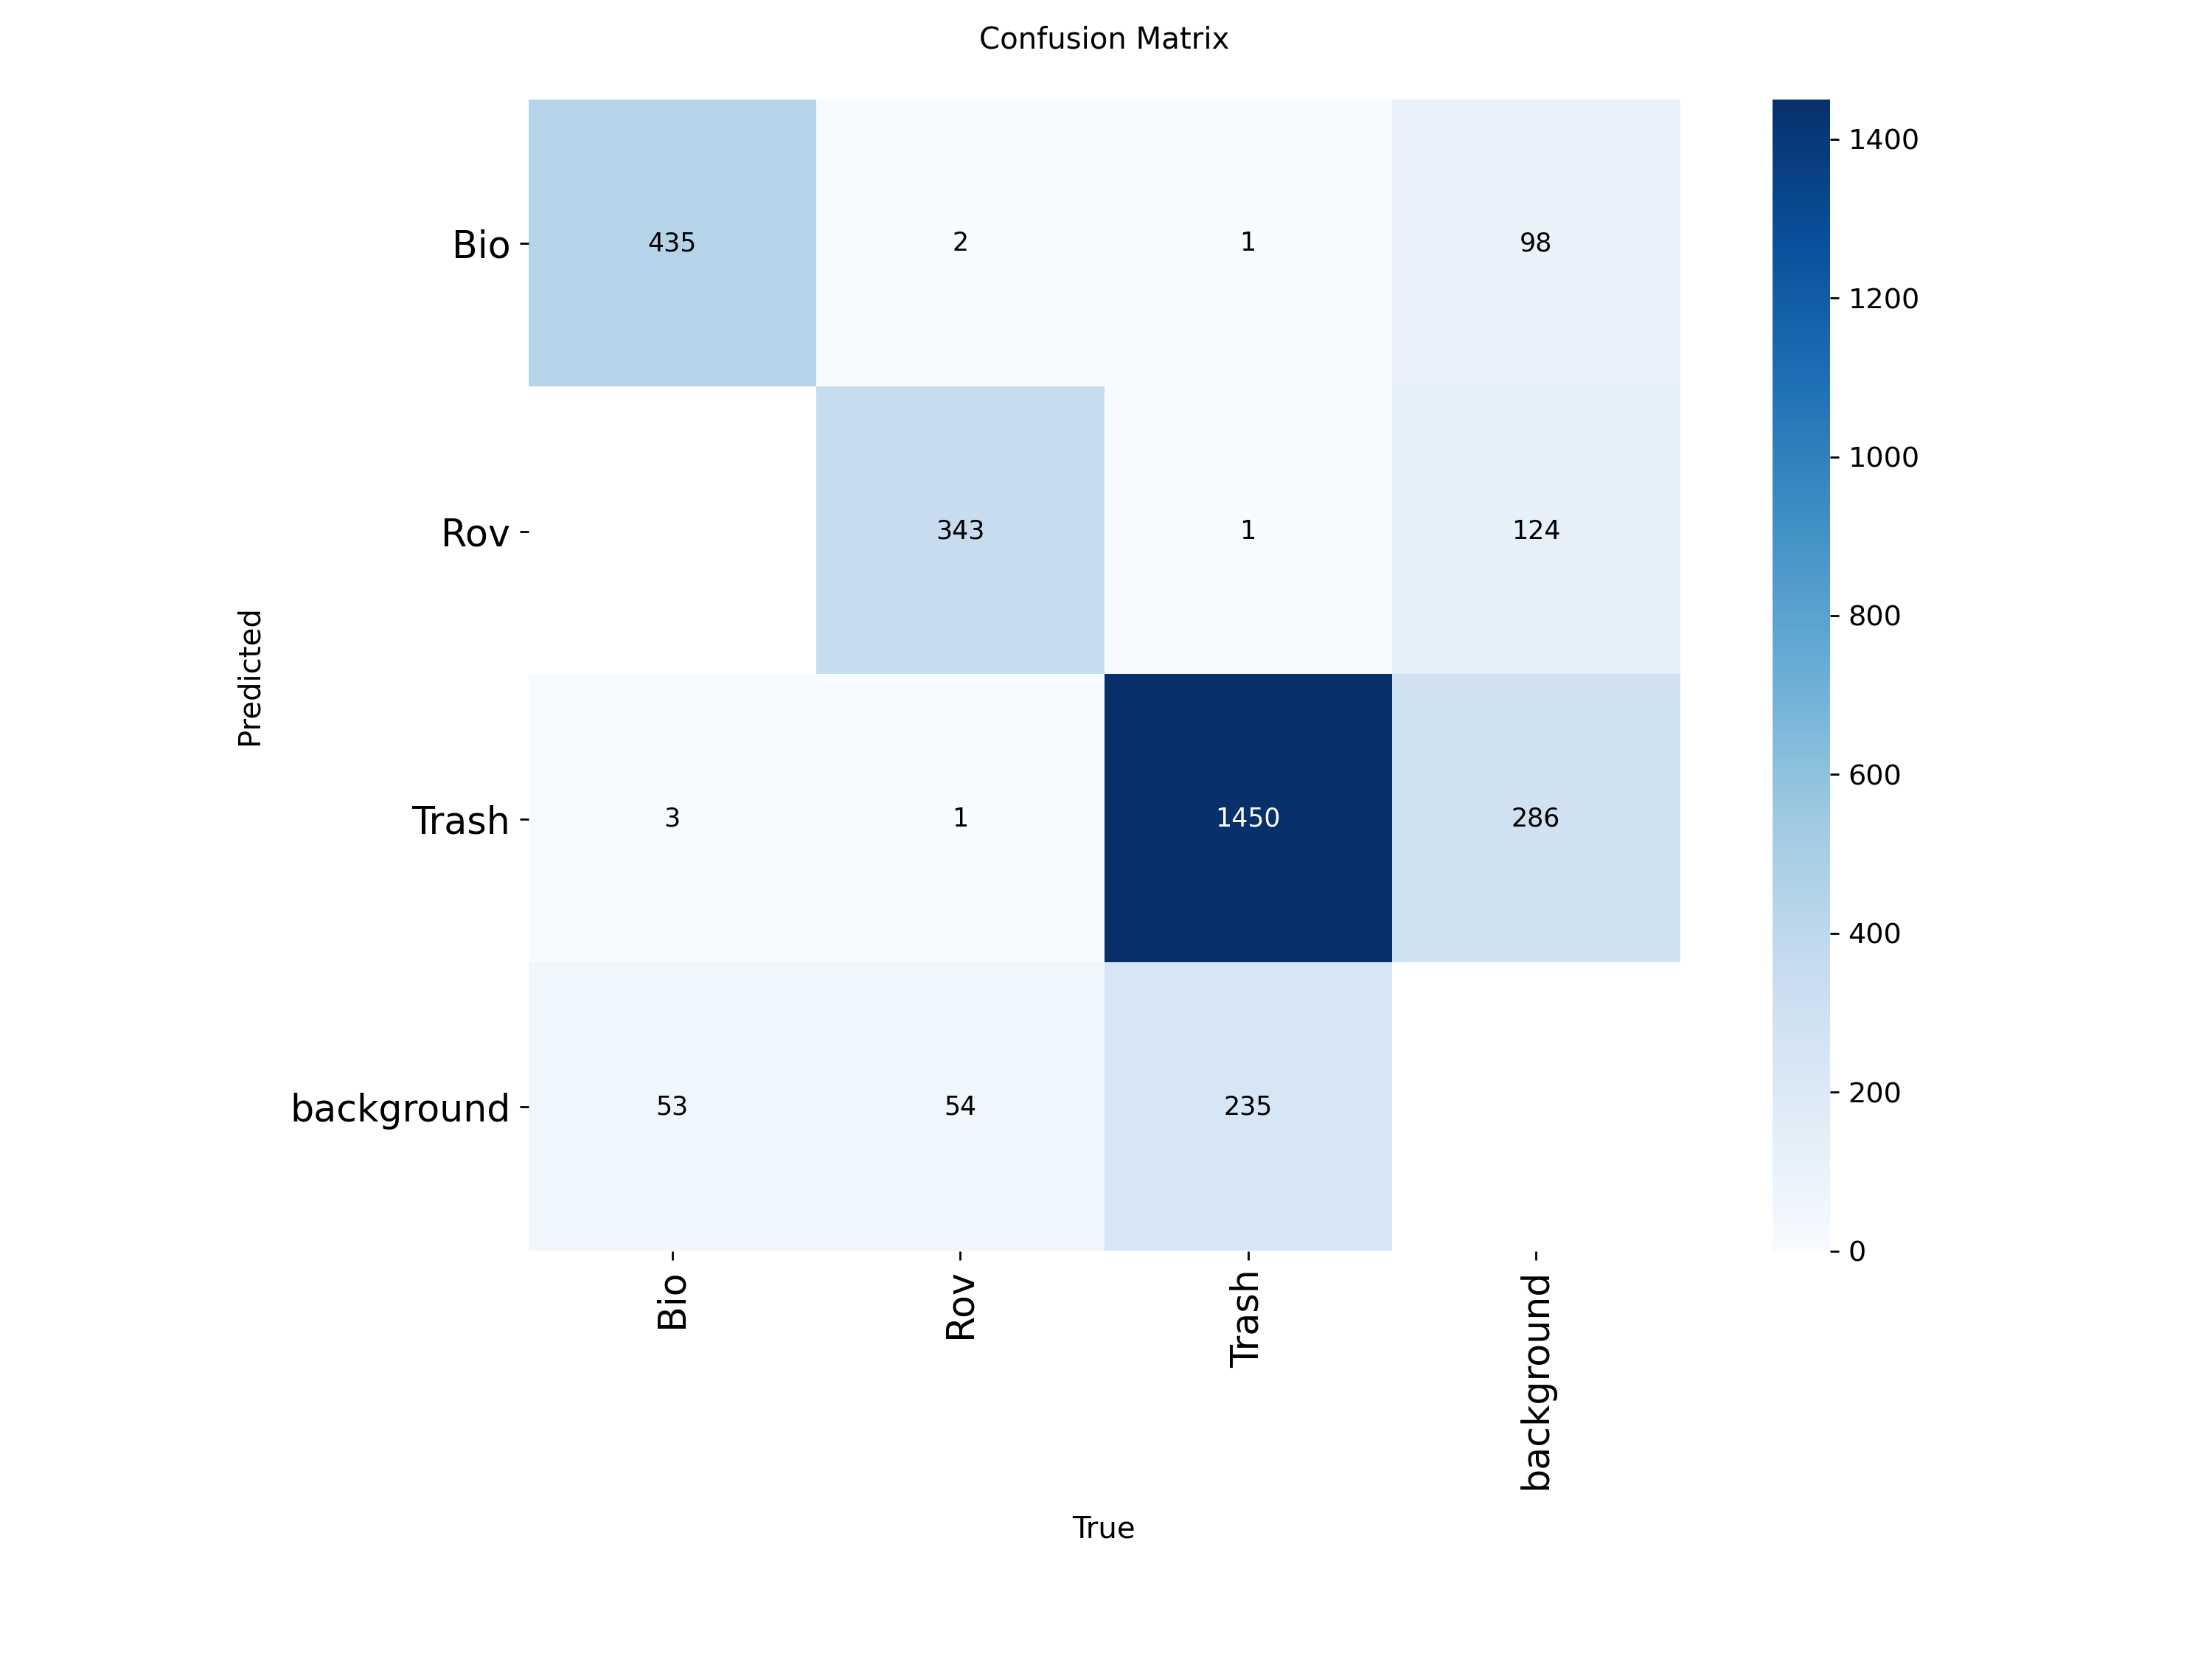

In [ ]:
IPyImage(filename='/content/runs/detect/train/confusion_matrix.png', width=1000)

### **Conclusions matrix**

- The model is very good at identifying "Trash" when it is actually "Trash". With 1450 correct detections, it is its strongest class.

- The model's biggest problem is confusing the "background" with real objects. It generates a high number of false positives, especially by classifying the background as "Trash".

- The confusion between the actual object classes (Bio, Rov, Trash) is relatively low. For example, it very rarely confuses "Bio" with "Rov". The problem isn't that it confuses a fish with a robot, but that it confuses water or sand with an object.

## **Viewing results - Predictions with Test Dataset**

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
preds = model(f"{test_path}/images")


image 1/473 /kaggle/input/underwater-trash-detection/utd2.v8i.yolov8/test/images/10_jpg.rf.14e925b316f259bd7789917b07fdaa05.jpg: 640x640 1 Trash, 12.5ms
image 2/473 /kaggle/input/underwater-trash-detection/utd2.v8i.yolov8/test/images/11_png_jpg.rf.591ad2b2b59cae7ad3661a2d9002492d.jpg: 640x640 1 Trash, 11.5ms
image 3/473 /kaggle/input/underwater-trash-detection/utd2.v8i.yolov8/test/images/22_jpg.rf.018cec93a69760a1c25414598cc4dabc.jpg: 640x640 2 Trashs, 11.3ms
image 4/473 /kaggle/input/underwater-trash-detection/utd2.v8i.yolov8/test/images/24_jpg.rf.b4fcb58ff1a26633a1746f56d51aa072.jpg: 640x640 1 Trash, 11.4ms
image 5/473 /kaggle/input/underwater-trash-detection/utd2.v8i.yolov8/test/images/FishDataset102_png_jpg.rf.5110b88bf29970cee30d9da601a9d579.jpg: 640x640 1 Bio, 11.0ms
image 6/473 /kaggle/input/underwater-trash-detection/utd2.v8i.yolov8/test/images/FishDataset26_png_jpg.rf.c2a5fe1d2d313d75502a3ec07af07c4f.jpg: 640x640 2 Bios, 10.9ms
image 7/473 /kaggle/input/underwater-trash-detec

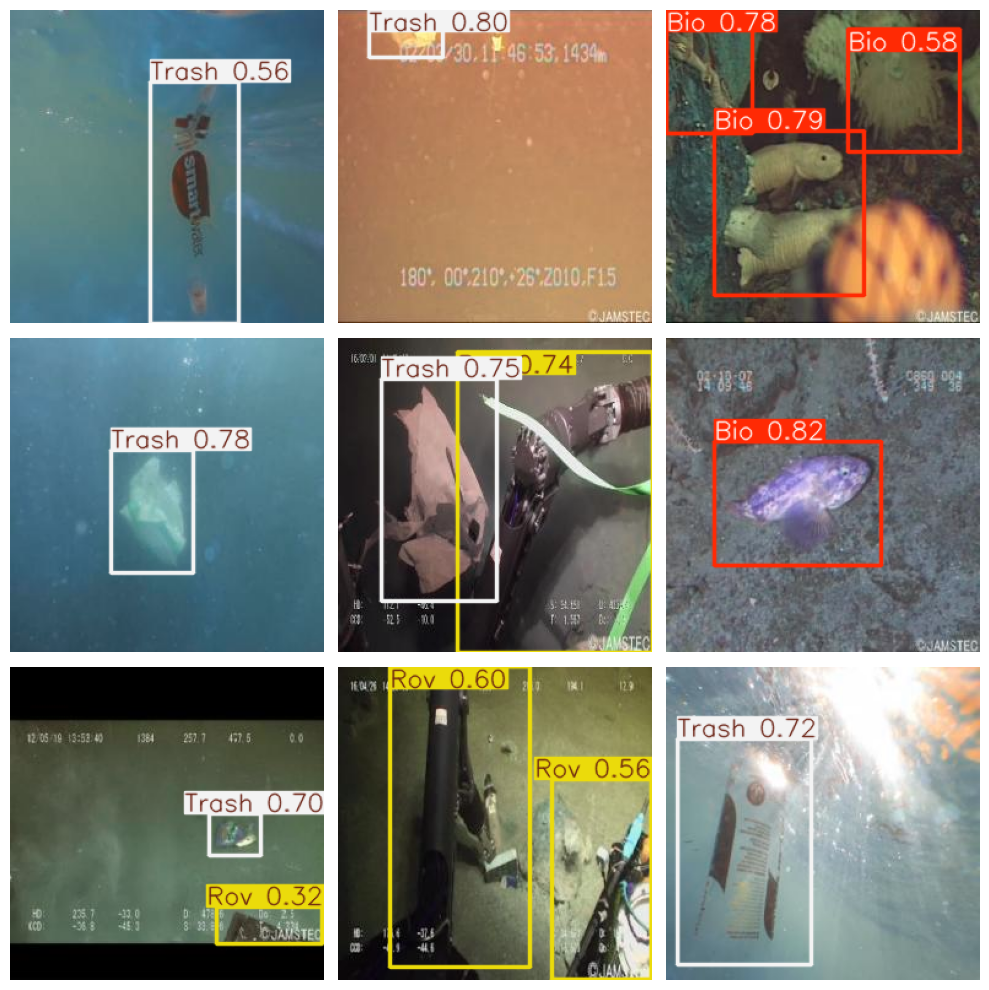

In [ ]:
import matplotlib.pyplot as plt
import random

num_preds_to_display = 9
selected_preds_indices = random.sample(range(len(preds)), num_preds_to_display)
selected_preds = [preds[i] for i in selected_preds_indices]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i, pred in enumerate(selected_preds):
    img = pred.plot()
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## **Comparison with other Yolo Models**

### **Yolo 11n Results**

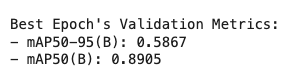

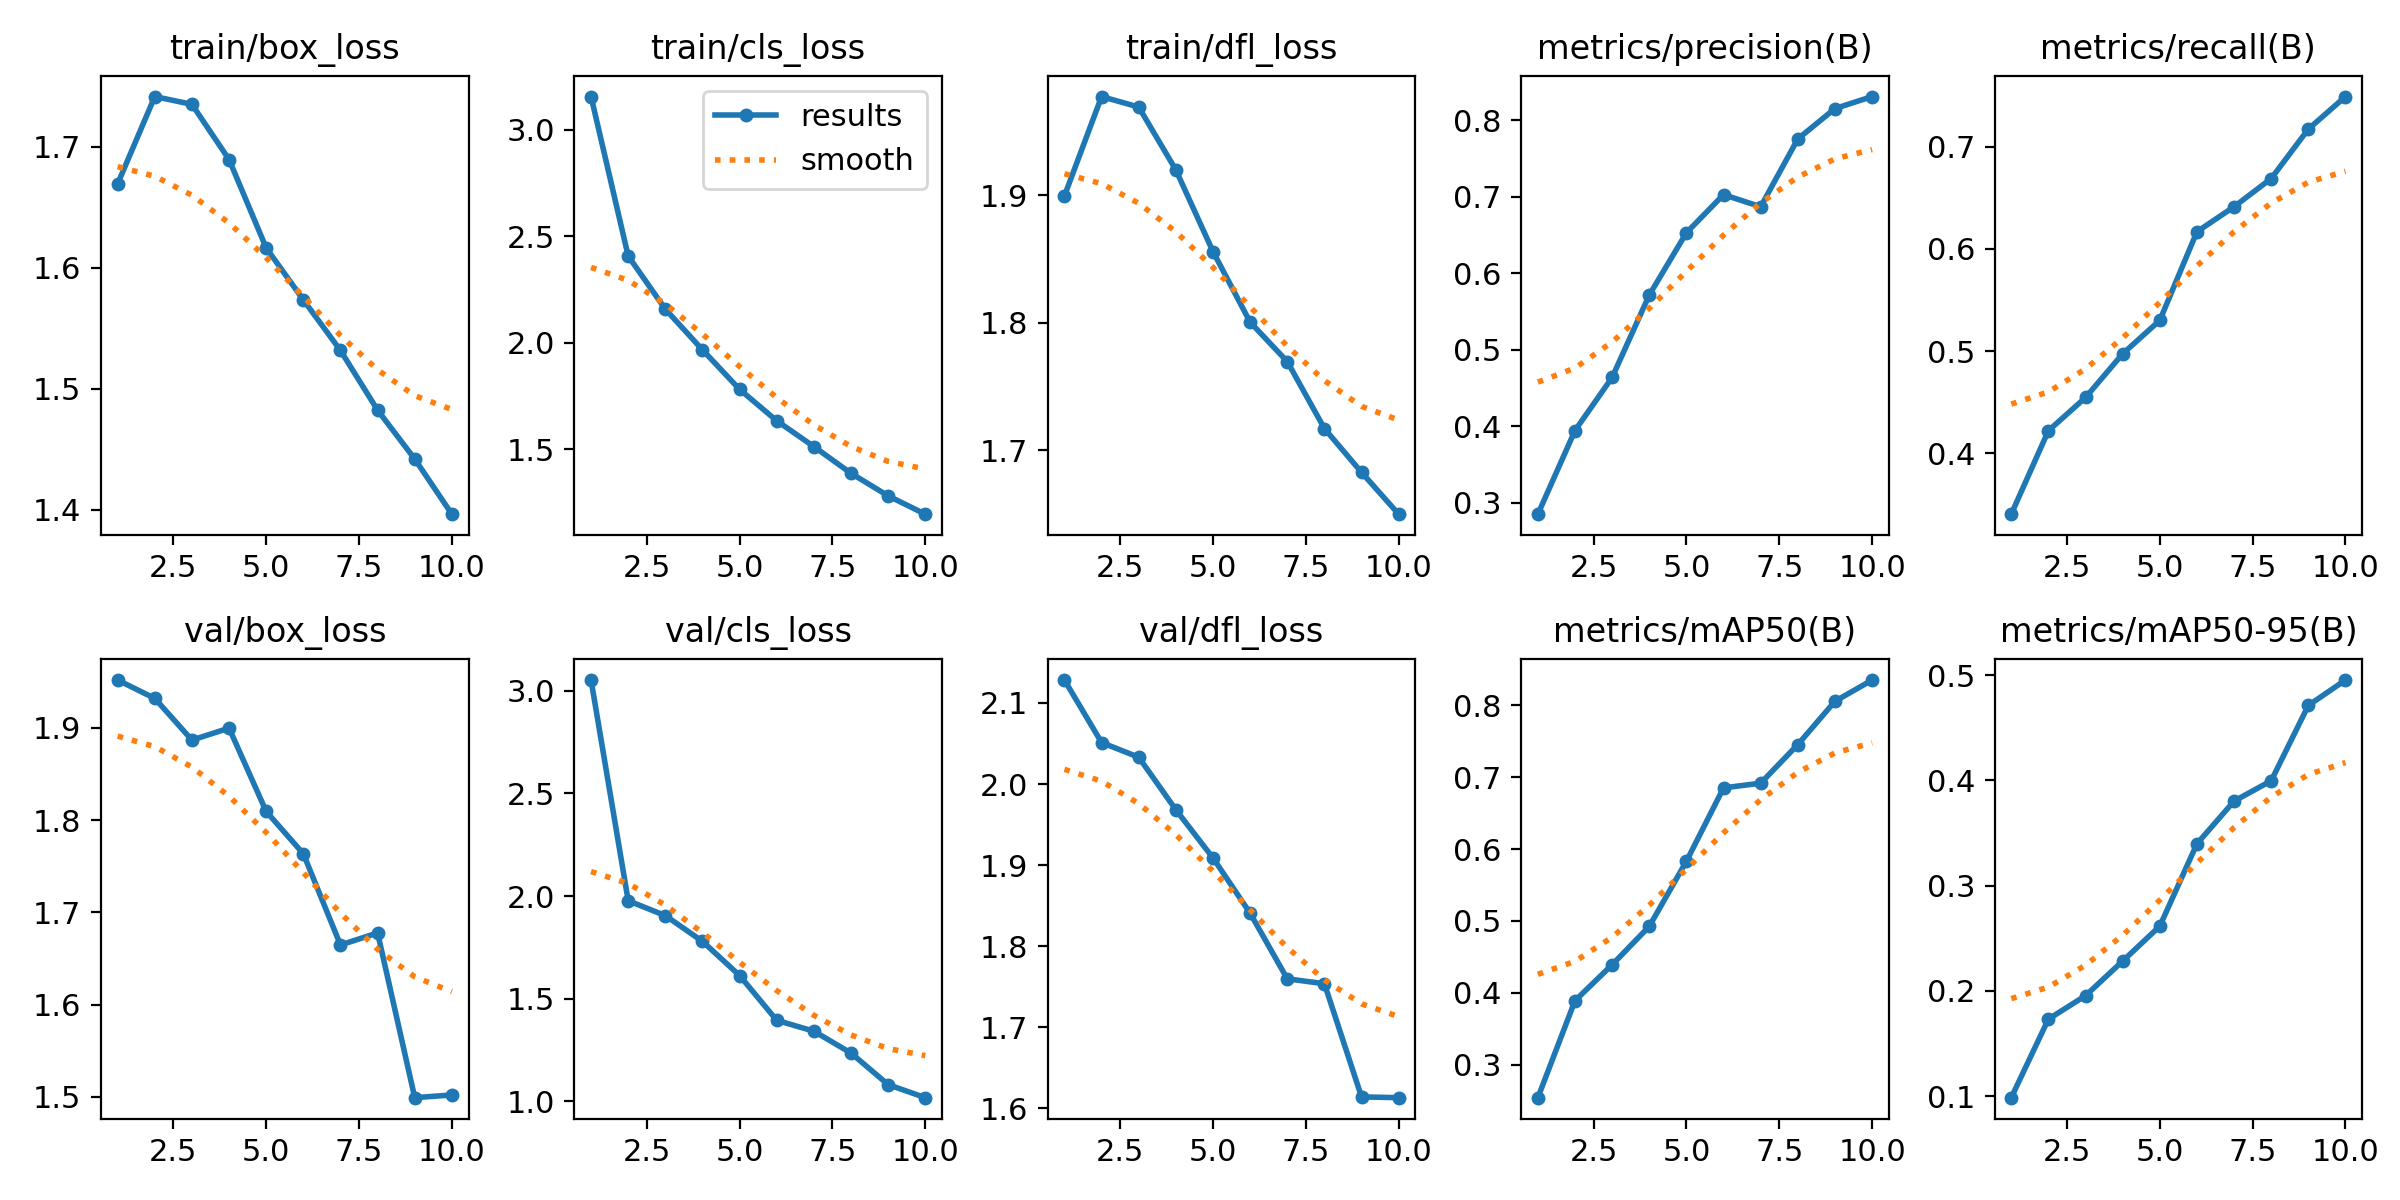

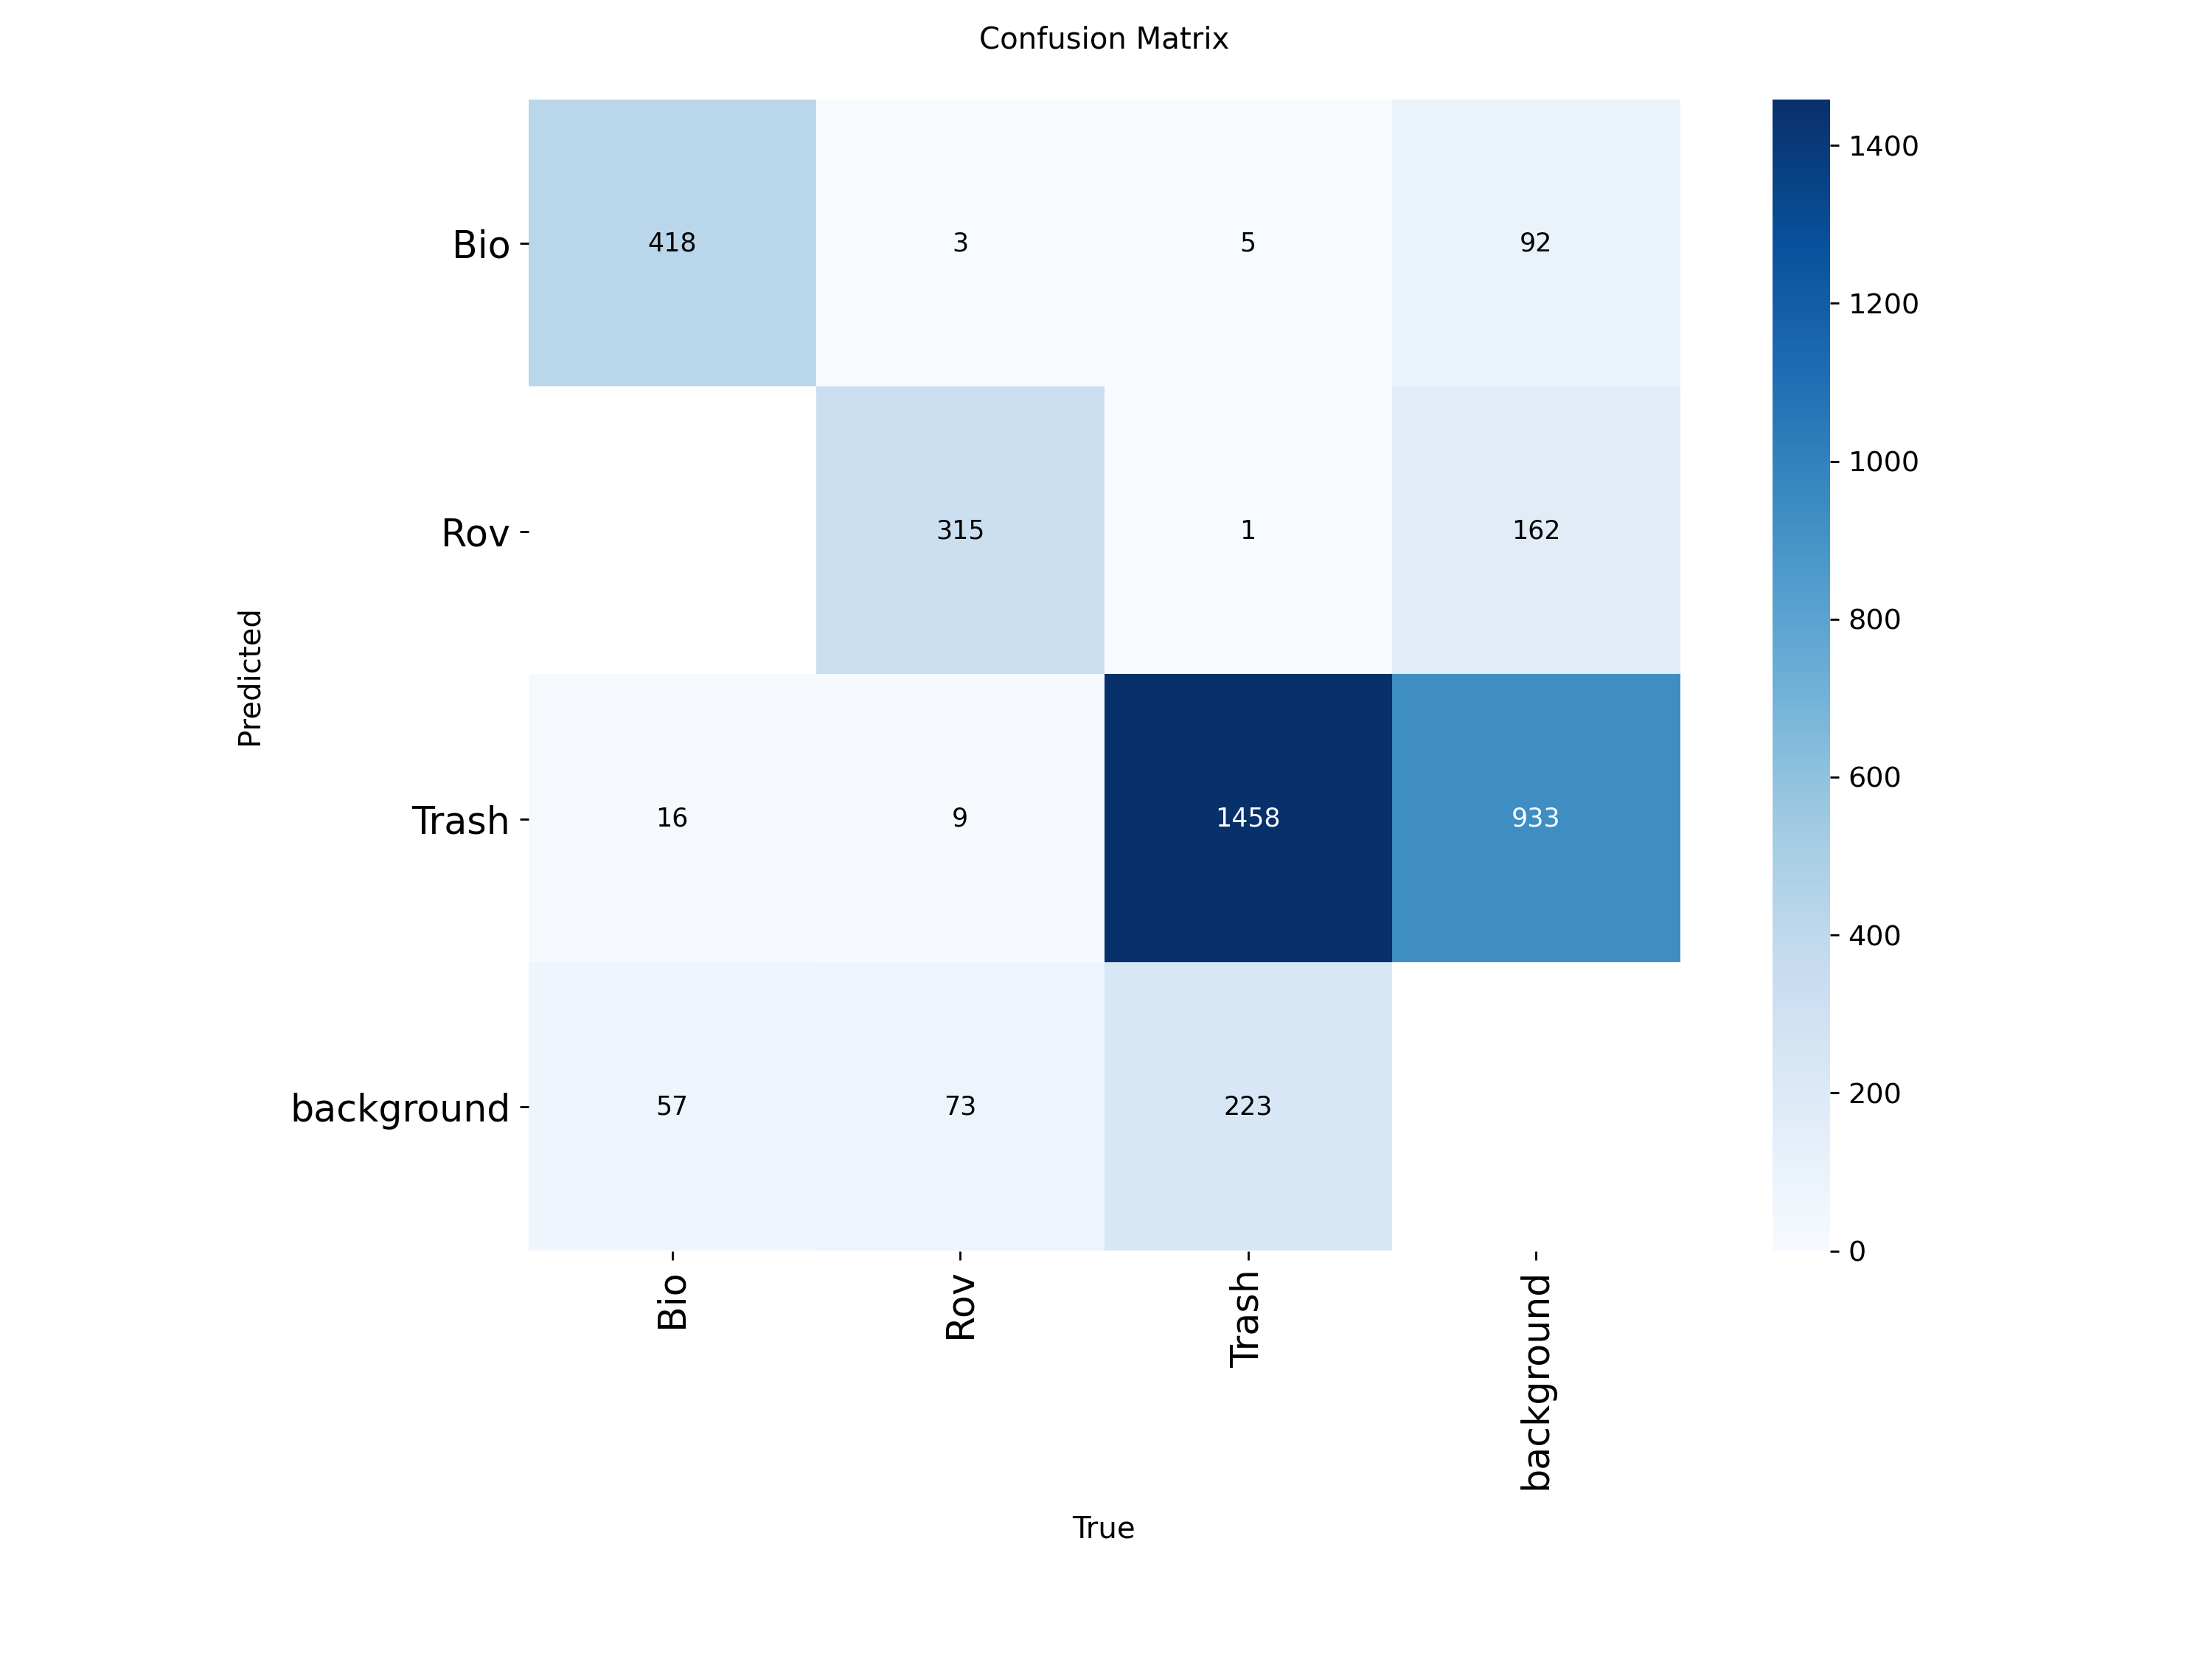

### **Yolo 11m Results**

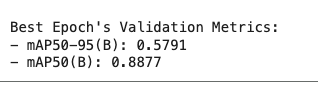

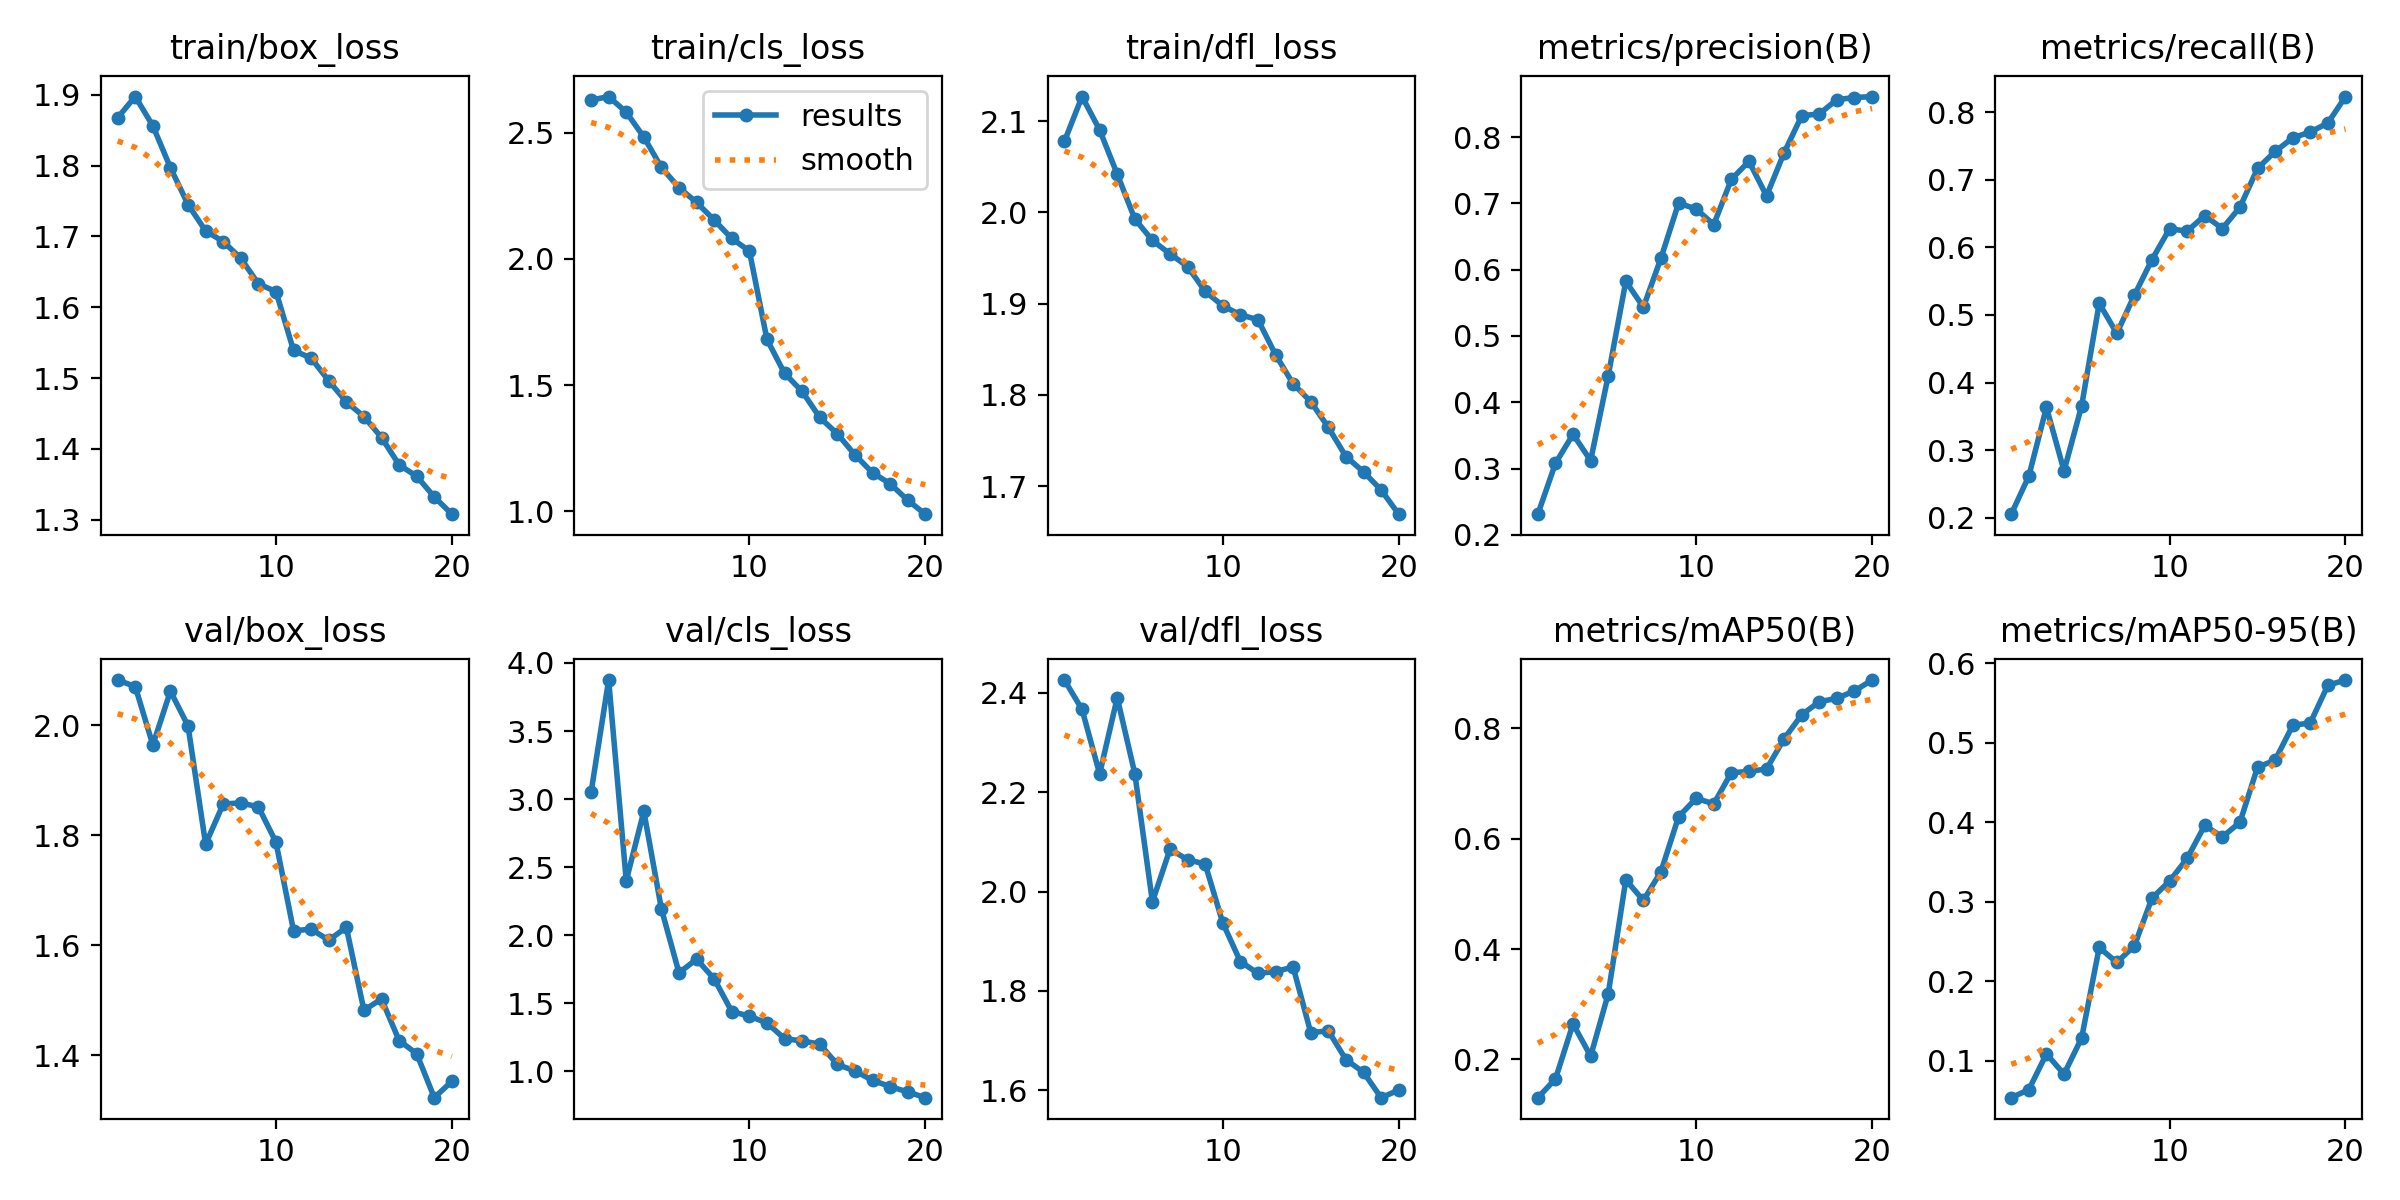

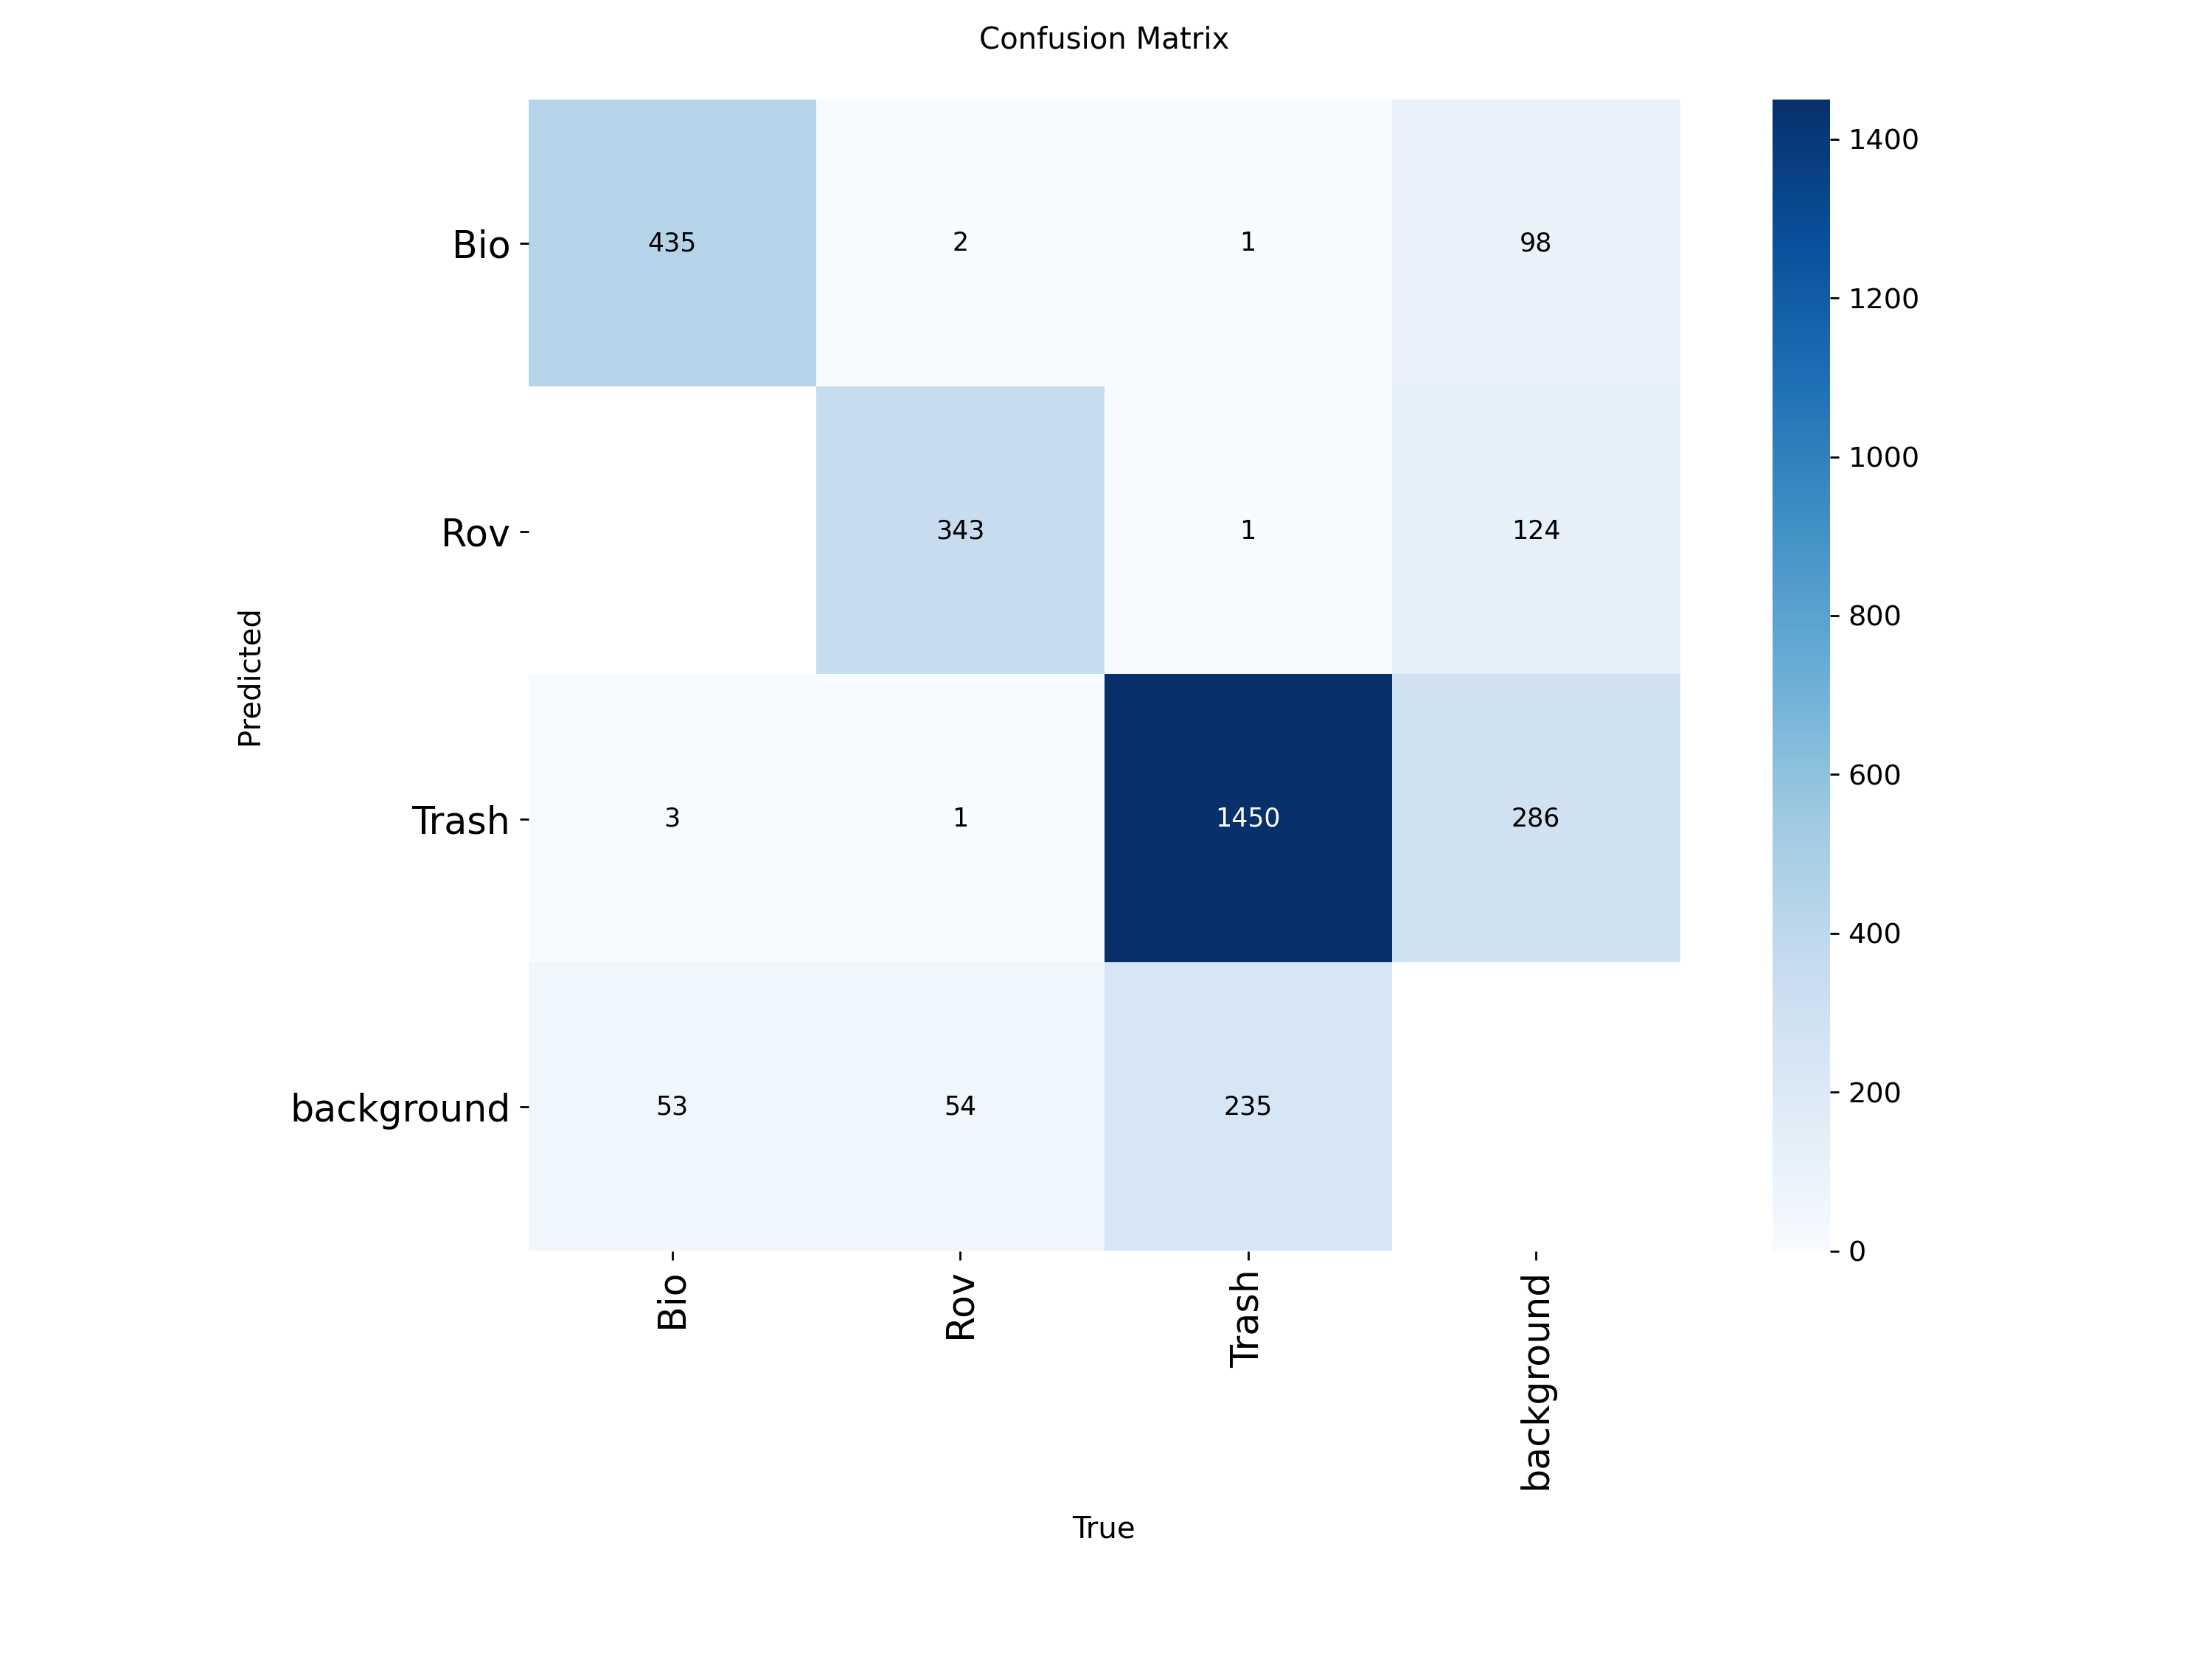

### Comparison of YOLOv11n, YOLOv11s, YOLOv11m Results

- **Overall Performance (mAP50-95):** The YOLOv11s model (mAP50-95: 0.65) shows a significantly better overall mean Average Precision compared to the YOLOv11m model (mAP50-95: 0.5791) and YOLOv11n (mAP50-95: 0.5867). This indicates that the small-sized model is more effective at detecting objects across different Intersection over Union (IoU) thresholds.
- **mAP50:** Both models perform well at an IoU threshold of 50%, with YOLOv11s (mAP50: 0.93), with YOLOv11m (mAP50: 0.8877) slightly outperforming YOLOv11n (mAP50: 0.8905). This suggests that the three models are reasonably good at getting the bounding box location approximately correct.
- **Confusion Matrix Analysis:**
    - **Trash Detection:** The models are strong at detecting "Trash", with YOLOv11s showing a higher number of correct "Trash" detections (1458) compared to YOLOv11m and YOLOv11n
    - **Background Confusion:** The models exhibit a significant issue with confusing the "background" with real objects, particularly with "Trash".
    - **Inter-Class Confusion:** The models show relatively low confusion between the actual object classes (Bio, Rov, Trash). The primary confusion is between objects and the background, not between different object types.
- **Loss Curves:** The loss curves for the models show a decreasing trend, indicating that training was progressing.
- **Traning Time:**: YOLOv11m took much longer compared to YOLOv11n and YOLOv11s, therefore YOLOv11s is faster and uses less resources.

In summary, the YOLOv11s model demonstrates superior performance in terms of mAP compared to the other models on this dataset. While the models struggle with background confusion, the small-sized model appears to handle this better and is more accurate overall.